# File and libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath=r'data/df_merch_3_mv_input.csv'


file_tag = "df_merch_outlier_input"

# DSLabs functions

In [2]:
%run "scripts/dslabs_functions.py"


# Data functions

In [3]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [4]:
# test_data=True
test_data=False

evaluate=True
# evaluate=False


if test_data==True:

    data=pd.read_csv(filepath)

    # 1% sample
    data=data.sample(frac=0.01, replace=False)
    

else:
    data=pd.read_csv(filepath)
    # 50% sample
    # data=data.sample(frac=0.5, replace=False)

 
target='returning_user'
target_metric='f2'

# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)



data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371499 entries, 0 to 371498
Data columns (total 42 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   event_name                       371499 non-null  float64
 1   device_category                  371499 non-null  float64
 2   device_mobile_brand_name         371499 non-null  float64
 3   device_mobile_model_name         371499 non-null  float64
 4   device_operating_system          371499 non-null  float64
 5   device_operating_system_version  371499 non-null  float64
 6   device_language                  371499 non-null  float64
 7   device_web_info_browser          371499 non-null  float64
 8   device_web_info_browser_version  371499 non-null  float64
 9   geo_region                       371499 non-null  float64
 10  geo_city                         371499 non-null  float64
 11  traffic_source_medium            371499 non-null  float64
 12  traffic

# Outlier Analysis

- engagement_time_msec is the only numeric column that has outliers that need to be treated
- this is most likely due to idle time by the user when navigating in the page and then clicking on something after some minutes.

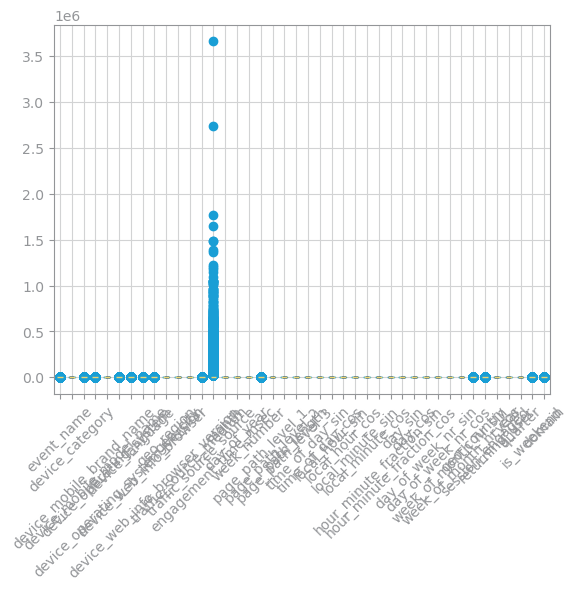

In [5]:
from matplotlib.pyplot import savefig, show


data.boxplot(rot=45)
# savefig(f"{file_tag}_global_boxplot.png")
show()


# Summary5 and var selection

In [6]:
var='engagement_time_msec'

summary5: DataFrame = data[[var]].describe(include="all")
summary5

,engagement_time_msec
count,3.714990e+05
mean,9.939234e+03
std,2.646999e+04
min,0.000000e+00
25%,4.600000e+01
50%,3.728000e+03
75%,1.040600e+04
max,3.659287e+06


# Out 1 - Outlier Truncation

## Out 1 strategy aplication

In [7]:
def apply_strategy_1(df):

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Outlier chapter   
    df_copy=truncate_outliers(df_copy, summary5, var)
 
    return df_copy

data_1=apply_strategy_1(data)



data_1[[var]].describe()


Data after truncating outliers: (371499, 42)


,engagement_time_msec
count,371499.000000
mean,8607.537908
std,13251.043392
min,0.000000
25%,46.000000
50%,3728.000000
75%,10406.000000
max,62879.204998


## Out 1 train/test split and Distribution

Labels=[0.0, 1.0]


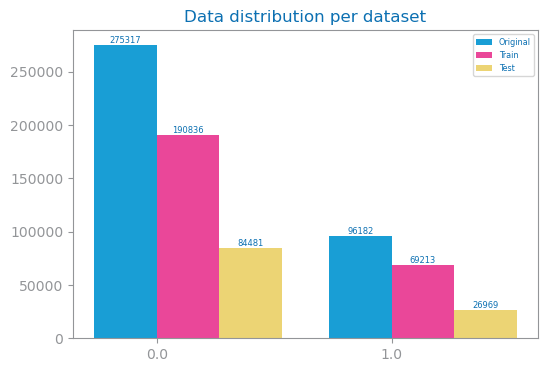

In [8]:
from pandas import concat
from sklearn.model_selection import train_test_split
from numpy import array, ndarray
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_multibar_chart



# Call the function to split the data

y_1, X_1, labels, values = define_target_and_prepare_data(data_1, target)

train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=data_1.columns), y_1, data_columns=data_1.columns, target_column=target)


# Distribution check
values["Train"] = [
    len(train_1[train_1[target] == 0]),
    len(train_1[train_1[target] == 1]),
]
values["Test"] = [
    len(test_1[test_1[target] == 0]),
    len(test_1[test_1[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()  

## Out 1 evaluate

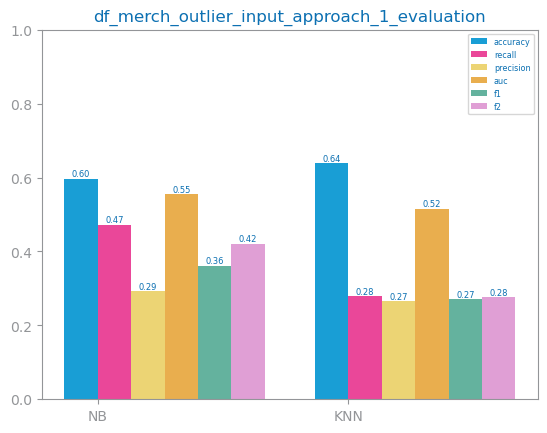

In [9]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values
if evaluate==True:

    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='returning_user', metric=target_metric)
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_approach_1_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_1_evaluation.png")
    show()

# Out 2 - drop outlier strategy


## Out 2 strategy aplication

In [10]:
from pandas import DataFrame, Series

def apply_strategy_2(df):
    
    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Outlier chapter
    df_copy=drop_outliers(df_copy, summary5, var)


    return df_copy



data_2=apply_strategy_2(data)




Data after truncating outliers: (363410, 42)


## Out 2 train/test split 

In [11]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter
# created split_data_save_csv on data_functions

# Call the function to split the data

y_2, X_2, labels, class_counts = define_target_and_prepare_data(data_2, target=target)


train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=data_2.columns), y_2, data_columns=data_2.columns, target_column=target)


values["Train"] = [
    len(train_2[train_2[target] == 0]),
    len(train_2[train_2[target] == 1]),
]
values["Test"] = [
    len(test_2[test_2[target] == 0]),
    len(test_2[test_2[target] == 1]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

Labels=[0.0, 1.0]


<Axes: title={'center': 'Data distribution per dataset'}>

## Out 2 evaluate

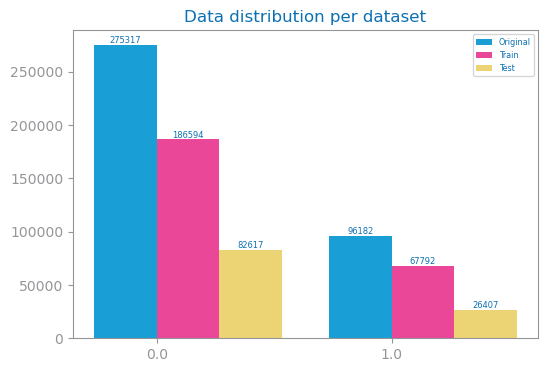

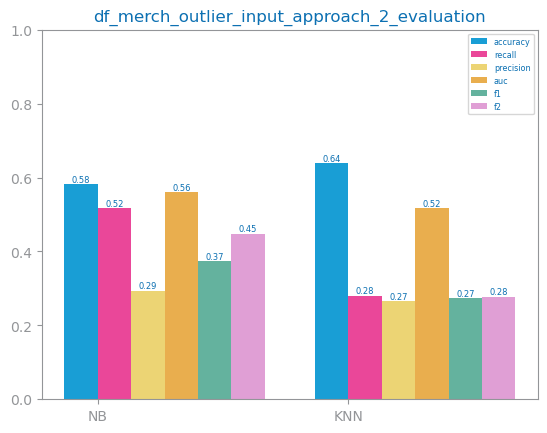

In [12]:
if evaluate ==True:

    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='returning_user', metric=target_metric)
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag}_approach_2_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_2_evaluation.png")
    show()

# Approach uplift comparison

## uplift df

In [13]:
algorithms = ['Naive Bayes', 'KNN']

# Create DataFrames for eval_1 and eval_2
df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

# Calculate uplift
df_uplift = df_eval_2 - df_eval_1



# Combine everything into one DataFrame (without misalignment issues)
comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



# Display the DataFrame
comparison_df

Approach 1                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.596590  0.472098  0.292993  0.554215  0.361581  0.420667   
KNN           0.638591  0.278616  0.265156  0.516061  0.271720  0.275816   

            Approach 2                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.581670  0.516416  0.293427  0.559472  0.374221  0.448282   
KNN           0.638061  0.280683  0.265882  0.516487  0.273082  0.277593   

              Uplift                                                    
            accuracy    recall precision       auc        f1        f2  
Naive Bayes -0.01492  0.044319  0.000434  0.005257  0.012640  0.027614  
KNN         -0.00053  0.002067  0.000726  0.000425  0.001363  0.001777

# Analysis

- better recall on out2 vs out1 (0.59 vs 0.55)
- other metrics are similar although most are better in approach 2

- data processing time is almost equal
- Considering out2 is the best between both strategies, if we compare between previous dataset and outlier treatment, we have
    - an improvement in NB recall (0.35 to 0.59!)
    - slight loss in NB accuracy: 0.63 to 0.59 
    - slight increase in auc (0.55 to 0.58)
    - no significant difference in KNN 

- Considering we seriously want to improve recall, then we will move forward with strategy outlier 2 (outlier drop)

## AI insight on recall

Why Recall Matters in Predicting Returning Users:

1. Maximizing Engagement Opportunities:

    - Predicting returning users correctly allows for personalized marketing, tailored content, and targeted offers. If the system misses a returning user (false negative), it’s a missed opportunity to engage with a user who could otherwise benefit from personalized strategies.
    - Having a higher recall ensures that you’re capturing the maximum number of actual returning users, even if some non-returning users are mistakenly classified as returning (false positives).

2. False Positives Aren’t as Costly:
    - In this case, a false positive means treating a new user as a returning user. While this might slightly reduce the accuracy of personalization, the cost of this mistake is generally low (e.g., showing personalized recommendations to a non-returning user).
    - False negatives (missing true returning users), on the other hand, mean lost opportunities for accurate personalization and retention efforts, which could directly affect engagement and conversion.

3. Personalization Strategies and Marketing Tactics:
    - Since personalization and remarketing strategies often rely on recognizing returning users, prioritizing recall ensures that your campaigns are more inclusive, targeting as many actual returning users as possible.
    - Even if your system misclassifies some users, the effect on user experience is minor compared to the benefit of catching more real returning users and improving their experience.

4. Conclusion:
    - Given that false positives are not very costly in your scenario and maximizing engagement with true returning users is key, focusing on better recall makes sense. The out1 strategy, which provides a significant recall improvement, would likely be more effective in helping your system predict returning users more accurately and improving marketing efforts.

# save to csv

In [15]:
if test_data==False:
    
    # out1 strategy applied (online truncation)
    data=apply_strategy_2(data)
    
    data.to_csv(f"data/df_merch_4_outlier_input.csv", index=False)
    

Data after truncating outliers: (363410, 42)
